In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pathlib
import imageio
import glob
import matplotlib.image as mpimg
import pandas as pd

In [3]:
from PIL import Image as im

In [4]:
import pywt
import pywt.data

In [5]:
from scipy import spatial
from sklearn.metrics.pairwise import euclidean_distances
import math

In [5]:
cv_img = []
for img in glob.glob("Downloads/wang/image.orig/*/*.jpg"):
    n= mpimg.imread(img,cv2.IMREAD_UNCHANGED)
    cv_img.append(n)

In [6]:
len(cv_img)

1000

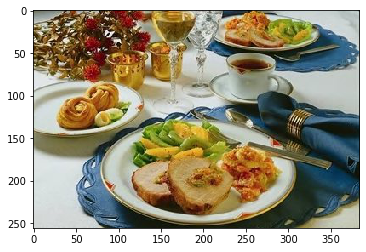

In [7]:
plt.imshow(cv_img[669])

In [415]:
d=[]
for x in cv_img:
    c=[]
    imgYCC = cv2.cvtColor(x, cv2.COLOR_BGR2YCR_CB)
    Y, Cr, Cb = cv2.split(imgYCC)
    edge=cv2.Canny(Y,120,80)
    merg=cv2.merge((edge,Cr,Cb))
    imgRGB = cv2.cvtColor(merg, cv2.COLOR_YCR_CB2BGR)
    color = ('b','g','r')
    for i in range(len(color)):
        histr = cv2.calcHist([imgRGB],[i],None,[256],[0,256])
        coeff = pywt.wavedec2(histr, 'haar', level=3)
        ca,cb,cc,cd=coeff
        ca_mean= np.mean(ca)
        cb_mean= np.mean(cb)
        cc_mean= np.mean(cc)
        cd_mean= np.mean(cd)       
        c.append([ca_mean,cb_mean,cc_mean,cd_mean])
    npc=np.array(c).flatten()
#     c_mean = np.mean(c)
    d.append(npc)
        
#         if(i==2):
#             coeff = pywt.wavedec2(histr, 'haar', level=2)
#             c.append(coeff[0])
#         else:    
#             coeff = pywt.wavedec2(histr, 'haar', level=3)
#             c.append(coeff[0])
#     d.append(c)                 

/home/akshita/anaconda3/lib/python3.7/site-packages/pywt/_multilevel.py:45: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [416]:
np.shape(d)

(1000, 12)

In [417]:
np_d=np.array(d)
# np_c=np_c[:,:,:,:]
np.shape(np_d)

(1000, 12)

In [402]:
df=pd.DataFrame(np_d)

In [196]:
df.to_csv('exp.csv', sep=',', header=None, index=None)

In [6]:
dataset = pd.read_csv('exp.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, [-1]].values

In [7]:
X.shape

(999, 12)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', gamma=1, C=100)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

/home/akshita/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred), '\n\n')
print(classification_report(y_test,y_pred))

[[21  0  0  0  0  0  0  1  0  0]
 [ 1 12  0  0  0  1  1  0  0  1]
 [ 4  1 20  1  2  0  0  1  0  0]
 [ 0  1  1 22  0  1  0  2  0  0]
 [ 0  2  0  0 14  2  2  5  4  3]
 [ 0  5  0  2  2  9  0  0  1  0]
 [ 0  5  0  1  1  5 14  0  0  0]
 [ 0  1  0  0  3  4  0 11  4  2]
 [ 0  1  0  0  5  2  0  7 11  2]
 [ 1  3  0  0  0  4  1  4  1 12]] 


              precision    recall  f1-score   support

           0       0.78      0.95      0.86        22
           1       0.39      0.75      0.51        16
           2       0.95      0.69      0.80        29
           3       0.85      0.81      0.83        27
           4       0.52      0.44      0.47        32
           5       0.32      0.47      0.38        19
           6       0.78      0.54      0.64        26
           7       0.35      0.44      0.39        25
           8       0.52      0.39      0.45        28
           9       0.60      0.46      0.52        26

    accuracy                           0.58       250
   macro avg    

In [ ]:
# model = Sequential()

# model.add(Dense(input_dim = 12, units = 240, activation='tanh', kernel_initializer='glorot_uniform'))
# model.add(Dense(units = 120, activation='tanh', kernel_initializer='glorot_uniform'))
# model.add(Dense(units = 1, activation='sigmoid', kernel_initializer='glorot_uniform'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(X_train,y_train,batch_size=200, epochs=30)
# model.evaluate(X_test,y_test)